In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras.layers import Dense, Flatten, Dropout

from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

## Loading Data

In [5]:
dataset_seed = 42
shuffle = True
training_split = 0.5

In [6]:
# Split the dataset into training and validation splits

training_data = image_dataset_from_directory(
	directory="/content/caltech-101/101_ObjectCategories",
	shuffle=shuffle,
	validation_split=training_split,
	seed=dataset_seed,
	subset='training',
	image_size=(224, 224),
	label_mode='categorical'
)

validation_data = image_dataset_from_directory(
	directory="/content/caltech-101/101_ObjectCategories",
	shuffle=shuffle,
	validation_split=training_split,
	seed=dataset_seed,
	subset='validation',
	image_size=(224, 224),
	label_mode='categorical'
)

Found 9144 files belonging to 102 classes.
Using 4572 files for training.
Found 9144 files belonging to 102 classes.
Using 4572 files for validation.


## Loading Pre-trained Model

In [8]:
vgg16 = tf.keras.applications.VGG16(include_top=False, weights='imagenet')

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [9]:
## Freezing internal layers of vgg16 (To prevent training them)
for layer in vgg16.layers:
	layer.trainable = False

## Creating custom classifier

In [15]:
custom_classifier = tf.keras.Sequential([
	Flatten(),
	Dense(2048, activation='relu'),
	Dropout(0.35),
	Dense(1024, activation='relu'),
	Dropout(0.3),
	Dense(512, activation='relu'),
	Dropout(0.3),
	Dense(256, activation='relu'),
	Dropout(0.2),
	Dense(102, activation='softmax')
])

## Creating model

In [16]:
model = tf.keras.Sequential([
	vgg16,
	custom_classifier
])

## Training the model

In [17]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [18]:
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=2, restore_best_weights=True)

In [ ]:
history = model.fit(training_data, epochs=5, validation_data=validation_data)

Epoch 1/5
 71/143 ━━━━━━━━━━━━━━━━━━━━ 9s 130ms/step - accuracy: 0.4402 - loss: 2.7807

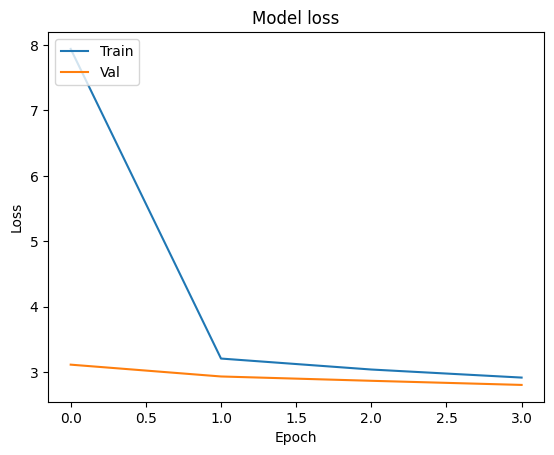

In [20]:
import matplotlib.pyplot as plt

# Plot training & validation loss values
plt.plot(model.history.history['loss'][:4])
plt.plot(model.history.history['val_loss'][:4])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

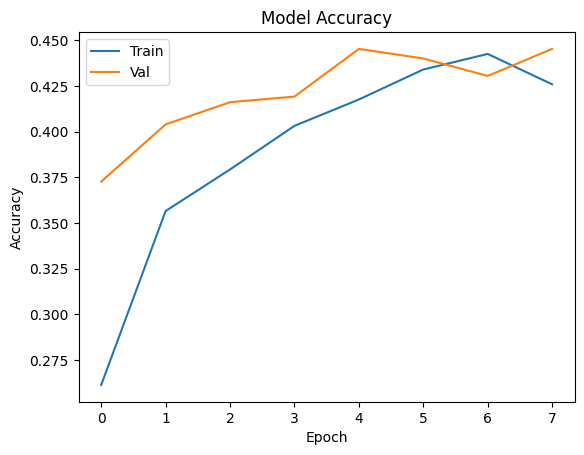

In [21]:
# Plot training & validation loss values
plt.plot(model.history.history['accuracy'])
plt.plot(model.history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

In [22]:
model.evaluate(testing_data)

71/71 ━━━━━━━━━━━━━━━━━━━━ 9s 123ms/step - accuracy: 0.4293 - loss: 2.7166


[2.7223119735717773, 0.42693662643432617]